In [167]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# def f(x):
#     return torch.exp(-x**2)
y = torch.abs(torch.randn((40, 40)))
TOT = 40*40
print(y.max(), y.min())
y = ((y - y.min()) / (y.max() - y.min()))
print(y.max(), y.min())
# A = -5
# B = 5
# N = 1000
dx = 1
# x = torch.linspace(A, B, N)
# y = f(x)
# plt.plot(x, y)

tensor(3.6253) tensor(0.0019)
tensor(1.) tensor(0.)


In [168]:
integral = torch.trapz(torch.trapz(y, dx=dx), dx=dx)
print(integral)

tensor(331.6003)


In [ ]:
def integral(y, dx):
    return torch.trapz(torch.trapz(y, dx=dx), dx=dx)
# Alpha is the parameter we want to optimize
alpha = torch.tensor(1.0, requires_grad=True)
loss = (integral(y ** (alpha**2),dx) - TOT*0.8) ** 2
print(loss)

# Optimize alpha
optimizer = torch.optim.Adam([alpha], lr=0.1)
for _ in range(10000):
    optimizer.zero_grad()
    loss = (integral(y ** (alpha**2), dx) - TOT*0.8) ** 2
    loss.backward()
    optimizer.step()
    print(f"Alpha = {alpha.item()}, Loss = {loss.item()}")

tensor(899461.9375, grad_fn=<PowBackward0>)
Alpha = 0.9000000357627869, Loss = 899461.9375
Alpha = 0.7998642921447754, Loss = 733956.5625
Alpha = 0.6995530724525452, Loss = 555696.75
Alpha = 0.5992932319641113, Loss = 377338.90625
Alpha = 0.4999811053276062, Loss = 216885.25
Alpha = 0.40373945236206055, Loss = 94192.3828125
Alpha = 0.31404706835746765, Loss = 22763.70703125
Alpha = 0.234462708234787, Loss = 198.7473602294922
Alpha = 0.1666565090417862, Loss = 8280.9111328125
Alpha = 0.10997046530246735, Loss = 26319.4375
Alpha = 0.06243335083127022, Loss = 42224.93359375
Alpha = 0.02176022157073021, Loss = 52332.70703125
Alpha = -0.014156438410282135, Loss = 56943.87109375
Alpha = -0.0470915362238884, Loss = 57321.78125
Alpha = -0.07846824824810028, Loss = 54566.15234375
Alpha = -0.10937248170375824, Loss = 49417.203125
Alpha = -0.14056053757667542, Loss = 42376.67578125
Alpha = -0.1724492609500885, Loss = 33907.63671875
Alpha = -0.20509247481822968, Loss = 24626.888671875
Alpha = -0.2

In [170]:
loss

tensor(0., grad_fn=<PowBackward0>)

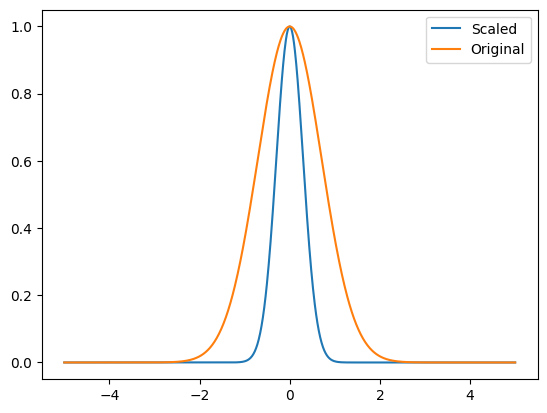

In [103]:
plt.plot(x, f(x) ** alpha.detach().numpy(), label="Scaled")
plt.plot(x, f(x), label="Original")
plt.legend()

In [ ]:
integral = integral(y ** (alpha**2), dx)
integral

tensor(1280., grad_fn=<MulBackward1>)

In [163]:
y.min(), y.max()

(tensor(0.), tensor(1.))

In [164]:
alpha**2

tensor(0.0775, grad_fn=<PowBackward0>)

In [165]:
y_a = y ** (alpha**2)
print(y_a.min(), y_a.max())

tensor(0., grad_fn=<MinBackward1>) tensor(1., grad_fn=<MaxBackward1>)


In [ ]:
def scale(y:torch.Tensor, perc:float=0.5, tolerance:float = 1e-5):
    """
    Scale the input tensor so that the area under the curve is perc of the total area.
    y is assumed to be a 2D tensor whose values are in the range [0,1].

    Args:
        - y (torch.Tensor): 2D tensor whose values are in the range [0,1].
        - perc (float, optional): Percentage of the total area. Defaults to 0.5.
        - tolerance (float, optional): Tolerance on the result. Defaults to 1e-3.

    Returns:
        torch.Tensor: The scaled version of y.
    """
    # Scale y so that the area under the curve is perc of the total area
    assert 0 <= perc <= 1, "perc must be in the range [0,1]"
    assert 0 <= tolerance, "tolerance must be positive"
    assert y.min() == 0 and y.max() == 1, "y must be in the range [0,1]"
    
    H,W = y.shape
    TOT = H*W
    
    def integral(y):
        return torch.trapz(torch.trapz(y))
    
    def loss(y, perc):
        return (integral(y) - TOT*perc) ** 2
    
    alpha = torch.tensor(1.0, requires_grad=True)
    optimizer = torch.optim.Adam([alpha], lr=0.1)
    
    for _ in range(10000):
        optimizer.zero_grad()
        loss_val = loss(y ** (alpha**2), perc)
        loss_val.backward()
        optimizer.step()
        if loss_val.item() < tolerance ** 2:
            break
        
    return y ** (alpha**2)

In [182]:
y = torch.abs(torch.randn((40, 40)))
y = ((y - y.min()) / (y.max() - y.min()))

y_scaled = scale(y, perc=0.8)

print(I(y, 1), I(y_scaled, 1))

tensor(361.8519) tensor(1279.9987, grad_fn=<MulBackward1>)
